In [2]:
import os
import numpy as np
from matplotlib import pyplot
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
training_data_x = pd.read_excel("/content/Final dataset Attrition.xlsx", engine ="openpyxl")
training_data_x.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,Higher_Education,Date_of_Hire,Date_of_termination,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode
0,37,Yes,Travel_Rarely,Research & Development,2,Male,2,1,Laboratory Technician,3,...,Graduation,2021-01-21,NaN,Salary,OFFICE,4,2,No,Job Event,Contract
1,21,No,Travel_Rarely,Research & Development,15,Male,3,1,Research Scientist,4,...,Graduation,2021-03-13,NaN,Work Accident,WFH,5,2,No,Recruiter,Part Time
2,45,No,Travel_Rarely,Research & Development,6,Male,3,3,Research Director,1,...,Post-Graduation,2021-01-23,NaN,Dept.Head,WFH,1,3,No,Job Event,Contract
3,23,No,Travel_Rarely,Sales,2,Male,3,1,Sales Representative,1,...,PHD,2021-04-25,NaN,Work Accident,OFFICE,1,0,Yes,Recruiter,FullTime
4,22,No,Travel_Rarely,Research & Development,15,Female,3,1,Laboratory Technician,4,...,PHD,2021-06-14,NaN,Better Opportunity,WFH,5,2,No,Job Event,Contract


# New Section

# **Notes about data**

We need to perform one-hot-encoding on some of the input features that are string-like and add them at the end of the training set. We may ignore the day of joining feature since the data about leaving is not provided and it would be trivial to have a single date as going by intuition it should have zero impact on the attrition rate.

**Features to be changed:** 


*   BusinessTravel
*   Department
*   Gender
*   JobRole
*   MaritalStatus
*   OverTime


# **Scaling Integer features**

In [17]:
x_age = training_data_x['Age'].to_numpy()
x_distanceFromHome = training_data_x['DistanceFromHome'].to_numpy()
x_jobInvolvement = training_data_x['JobInvolvement'].to_numpy()
x_jobLevel = training_data_x['JobLevel'].to_numpy()
x_jobSatisfaction = training_data_x['JobSatisfaction'].to_numpy()
x_monthlyIncome = training_data_x['MonthlyIncome'].to_numpy()
x_numCompaniesWorked = training_data_x['NumCompaniesWorked'].to_numpy()
x_percentSalaryHike = training_data_x['PercentSalaryHike'].to_numpy()
x_performanceRating = training_data_x['PerformanceRating'].to_numpy()
x_stockOptionLevel = training_data_x['StockOptionLevel'].to_numpy()
x_totalWorkingYears = training_data_x['TotalWorkingYears'].to_numpy()
x_trainingTimesLastYear = training_data_x['TrainingTimesLastYear'].to_numpy()
x_yearsAtCompany = training_data_x['YearsAtCompany'].to_numpy()
x_yearsSinceLastPromotion = training_data_x['YearsSinceLastPromotion'].to_numpy()
x_yearsWithCurrManager = training_data_x['YearsWithCurrManager'].to_numpy()
x_leaves = training_data_x['Leaves'].to_numpy()
x_absenteeism = training_data_x['Absenteeism'].to_numpy()

In [48]:
attrition = training_data_x['Attrition'].to_numpy()
attritionBoolean = []
for x in attrition:
  if(x == "Yes"):
    attritionBoolean.append(1)
  else:
    attritionBoolean.append(0)
attritionBoolean = np.array(attritionBoolean)
print(attritionBoolean)

[1 0 0 ... 0 0 1]


In [49]:
scalingFeatures = np.array(attritionBoolean)
scalingFeatures = np.vstack([scalingFeatures, x_age, x_distanceFromHome, x_jobInvolvement, x_jobLevel, x_jobSatisfaction, x_monthlyIncome, 
                             x_numCompaniesWorked, x_percentSalaryHike, x_performanceRating, x_stockOptionLevel, x_totalWorkingYears, 
                             x_trainingTimesLastYear, x_yearsAtCompany, x_yearsSinceLastPromotion, x_yearsWithCurrManager, x_leaves, 
                             x_absenteeism])
scalingFeatures = scalingFeatures.transpose()
print(scalingFeatures)

[[ 1 37  2 ...  0  4  2]
 [ 0 21 15 ...  0  5  2]
 [ 0 45  6 ...  0  1  3]
 ...
 [ 0 55 26 ... 13  2  1]
 [ 0 58 10 ...  8  2  2]
 [ 1 58 23 ...  6  4  3]]


# **Features to be split through one hot encoding**

In [50]:
x_workAccident = training_data_x['Work_accident'].to_numpy()
x_businessTravel = training_data_x['BusinessTravel'].to_numpy()
x_department = training_data_x['Department'].to_numpy()
x_gender = training_data_x['Gender'].to_numpy()
x_jobRole = training_data_x['JobRole'].to_numpy()
x_maritalStatus = training_data_x['MaritalStatus'].to_numpy()
x_overtime = training_data_x['OverTime'].to_numpy()
x_higherEducation = training_data_x['Higher_Education'].to_numpy()
x_statusOfLeaving = training_data_x['Status_of_leaving'].to_numpy()
x_modeOfWork = training_data_x['Mode_of_work'].to_numpy()
x_sourceOfHire = training_data_x['Source_of_Hire'].to_numpy()
x_jobMode = training_data_x['Job_mode'].to_numpy()

In [93]:
stringFeatures = np.array(x_workAccident)
stringFeatures = np.vstack([stringFeatures, x_businessTravel, x_department, x_gender, x_jobRole, x_maritalStatus, x_overtime, x_higherEducation,
                            x_statusOfLeaving, x_modeOfWork, x_sourceOfHire, x_jobMode])
stringFeatures = stringFeatures.transpose()

In [52]:
featureEncoder = OneHotEncoder(handle_unknown = 'ignore')
featureEncoder.fit(stringFeatures)
featureEncoder.categories_

[array(['No', 'Yes'], dtype=object),
 array(['Non-Travel', 'Travel_Frequently', 'Travel_Rarely'], dtype=object),
 array(['Human Resources', 'Research & Development', 'Sales'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array(['Healthcare Representative', 'Human Resources',
        'Laboratory Technician', 'Manager', 'Manufacturing Director',
        'Research Director', 'Research Scientist', 'Sales Executive',
        'Sales Representative'], dtype=object),
 array(['Divorced', 'Married', 'Single'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['12th', 'Graduation', 'PHD', 'Post-Graduation'], dtype=object),
 array(['Better Opportunity', 'Dept.Head', 'Salary', 'Work Accident',
        'Work Environment'], dtype=object),
 array(['OFFICE', 'WFH'], dtype=object),
 array(['Job Event', 'Job Portal', 'Recruiter', 'Walk-in'], dtype=object),
 array(['Contract', 'FullTime', 'Part Time'], dtype=object)]

In [94]:
print("Schema for encoded format of string features")
featureEncoder.get_feature_names_out(['workAccident', 
                                      'businessTravel',
                                      'department',
                                      'gender',
                                      'jobRole',
                                      'maritalStatus',
                                      'overtime',
                                      'higherEducation',
                                      'statusOfLeaving',
                                      'modeOfWork',
                                      'sourceOfHire',
                                      'jobMode'])

Schema for encoded format of string features


array(['workAccident_No', 'workAccident_Yes', 'businessTravel_Non-Travel',
       'businessTravel_Travel_Frequently', 'businessTravel_Travel_Rarely',
       'department_Human Resources', 'department_Research & Development',
       'department_Sales', 'gender_Female', 'gender_Male',
       'jobRole_Healthcare Representative', 'jobRole_Human Resources',
       'jobRole_Laboratory Technician', 'jobRole_Manager',
       'jobRole_Manufacturing Director', 'jobRole_Research Director',
       'jobRole_Research Scientist', 'jobRole_Sales Executive',
       'jobRole_Sales Representative', 'maritalStatus_Divorced',
       'maritalStatus_Married', 'maritalStatus_Single', 'overtime_No',
       'overtime_Yes', 'higherEducation_12th',
       'higherEducation_Graduation', 'higherEducation_PHD',
       'higherEducation_Post-Graduation',
       'statusOfLeaving_Better Opportunity', 'statusOfLeaving_Dept.Head',
       'statusOfLeaving_Salary', 'statusOfLeaving_Work Accident',
       'statusOfLeaving_Work

In [54]:
finalStringFeatures = featureEncoder.transform(stringFeatures).toarray()
print(finalStringFeatures)

[[1. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 1. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 1. 0.]]


In [55]:
finalData = np.concatenate((scalingFeatures, finalStringFeatures), axis = 1)
print(finalData)

[[ 1. 37.  2. ...  1.  0.  0.]
 [ 0. 21. 15. ...  0.  0.  1.]
 [ 0. 45.  6. ...  1.  0.  0.]
 ...
 [ 0. 55. 26. ...  0.  0.  1.]
 [ 0. 58. 10. ...  0.  0.  1.]
 [ 1. 58. 23. ...  0.  1.  0.]]


# **Schema for the final Data**
y(attritionBoolean),

x_age, 

x_distanceFromHome, 

x_jobInvolvement, 

x_jobLevel, 

x_jobSatisfaction, 

x_monthlyIncome, 

x_numCompaniesWorked,

x_percentSalaryHike, 

x_performanceRating, 

x_stockOptionLevel, 

x_totalWorkingYears, 

x_trainingTimesLastYear,

x_yearsAtCompany, 

x_yearsSinceLastPromotion, 

x_yearsWithCurrManager, 

x_leaves, 

x_absenteeism

Rest of string features encoded



****


**We now split the data into two parts the first 1000 entries for training and the remaining as test data to test our model's accuracy.**

In [60]:
trainData = finalData[:1000]
testData = finalData[1000:]

train_x = trainData[:,1:]
train_y = trainData[:,0]

test_x = testData[:,1:]
test_y = testData[:,0]

[[37.  2.  2. ...  1.  0.  0.]
 [21. 15.  3. ...  0.  0.  1.]
 [45.  6.  3. ...  1.  0.  0.]
 ...
 [43.  3.  1. ...  0.  0.  1.]
 [26.  4.  3. ...  1.  0.  0.]
 [30.  9.  3. ...  0.  1.  0.]]


# **Logistic Regression**

In [78]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr', max_iter = 2000).fit(train_x, train_y)

In [79]:
print("Accuracy on training data: {}% ".format(round(LR.score(train_x,train_y),8)*100))
print("Accuracy on last 472 entries of test data: {}% " .format(round(LR.score(test_x,test_y), 8)*100))

Accuracy on training data: 87.5% 
Accuracy on last 472 entries of test data: 90.425532% 


**Determining AUC for logistic regression**

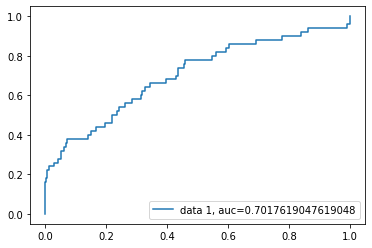

In [91]:
from sklearn import metrics
import matplotlib.pyplot as plt

y_pred_proba = LR.predict_proba(test_x)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_y,  y_pred_proba)
auc = metrics.roc_auc_score(test_y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

**Conclusion for logistic regression**


We get an accuracy of 87.5% on the training data and 90.4% on the test data through the weights for feature we get through logistic regression. Now let us try other algorithms/models/methods.

# **Random Forests**

In [84]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=1000, max_depth=4, random_state=0)
RF.fit(train_x, train_y)

RandomForestClassifier(max_depth=4, n_estimators=1000, random_state=0)

In [85]:
print("Accuracy on training data: {}% ".format(round(RF.score(train_x,train_y),8)*100))
print("Accuracy on last 472 entries of test data: {}% " .format(round(RF.score(test_x,test_y), 8)*100))

Accuracy on training data: 84.0% 
Accuracy on last 472 entries of test data: 89.361702% 


**Determining AUC for Random Forest Classif**

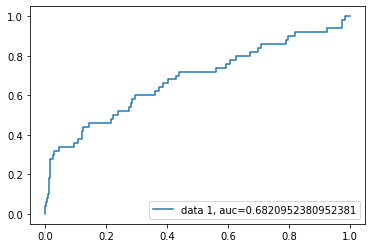

In [92]:
y_pred_proba = RF.predict_proba(test_x)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_y,  y_pred_proba)
auc = metrics.roc_auc_score(test_y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# **Neural Networks**

In [99]:
from sklearn.neural_network import MLPClassifier

NN = MLPClassifier(solver='lbfgs', alpha=0.00001, hidden_layer_sizes=(30,30,30,30), random_state=1, max_iter = 100000)
NN.fit(train_x, train_y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(30, 30, 30, 30), max_iter=100000,
              random_state=1, solver='lbfgs')

In [100]:
print("Accuracy on training data: {}% ".format(round(NN.score(train_x,train_y),8)*100))
print("Accuracy on last 472 entries of test data: {}% " .format(round(NN.score(test_x,test_y), 8)*100))

Accuracy on training data: 81.5% 
Accuracy on last 472 entries of test data: 89.361702% 


**Determining AUC for Neural Networks**

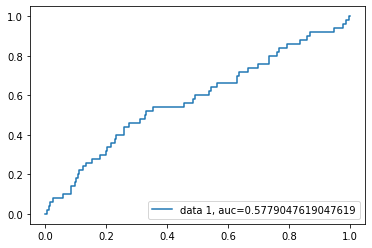

In [101]:
y_pred_proba = NN.predict_proba(test_x)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_y,  y_pred_proba)
auc = metrics.roc_auc_score(test_y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# **Conclusion**

Although the implementations of these models were rather naive (in practice there are a variety of parameters that can and should be varied for each model), we can still compare the predictive accuracy across the models. This will tell us which one is the most accurate for this specific training and test dataset:

**Model Details**

Logistic Regression

*   *Accuracy on test data: 90.42%*
*   *AUC: 0.70*

Random Forest Classifier

*   *Accuracy on test data: 84.0%*
*   *AUC: 0.68*

Neural Network(Layers - 30,30,30,30)

*   *Accuracy on test data: 81.5%*
*   *AUC: 0.57*